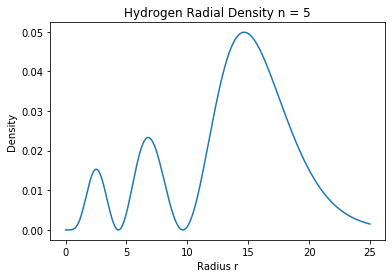

In [3]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""

# Hdensity.py:  Hydrogen Radial density calling rk4Algor

import numpy as np
import matplotlib.pylab as plt
#from rk4Algor import rk4Algor if rk4algor in same directory as this file
%matplotlib inline
n = 5; el = 2; dr = 0.01                # n = npr+el+1                                  
rVec = np.zeros((2500),float)         # array for plot
RhoVec = np.zeros((2500),float)        # Density array
fvector = np.zeros(2) 
y = np.zeros(2);  y[0] = 1e-8;  y[1] = 0       
                                    
def f(r,y):                              # RHS of ODE                 
    fvector[0] = y[1]
    fvector[1] = -(2/r-1)*y[1]-((n-1)/r-el*(el+1)/r**2)*y[0]
    return fvector

# Integration
f(0.001,y)                                # f(t= 0)
i = 0
def rk4Algor(t, h, N, y, f):
    k1=np.zeros(N); k2=np.zeros(N); k3=np.zeros(N); k4=np.zeros(N);
    k1 = h*f(t,y)                             
    k2 = h*f(t+h/2.,y+k1/2.)
    k3= h*f(t+h/2.,y+k2/2.)
    k4= h*f(t+h,y+k3)
    y=y+(k1+2*(k2+k3)+k4)/6.
    return y    
for r in np.arange(0.001,25,dr):
    rVec[i] = r
    y = rk4Algor(r, dr, 2, y, f)   # call rk4 algorithm  
    RhoVec[i] = 4*3.141593*(y[0]*np.exp(-0.5*r) )**2 *r**2        
    i = i+1
plt.figure()
plt.plot(rVec,RhoVec)
plt.title('Hydrogen Radial Density n = 5')
plt.xlabel('Radius r')
plt.ylabel('Density')
plt.show()